In [79]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

GM=3.98601877e14
R=6.3781e6

def xycomp_vector(mag,deg):
    x=mag*np.cos(math.radians(deg))
    y=mag*np.sin(math.radians(deg))
    return [x,y]

def magnitude(x):
    return np.linalg.norm(x)

def Function(F,t,x,v):
    if F==1:
        return v
    if F==2:
        a=((-G*M)/(x[0]**2+x[1]**2)**1.5)*np.array([x[0],x[1]])
        return a


class satellite():
    def __init__(self, p=np.array[0,0], v=np.array[0,0]):
        self.p = p
        self.v = v
        self.plist = np.array[p]
        self.vlist= np.array[v]

    def add_plist(self, newp):
        self.plist.append(newp)
        return self.plist
    def add_vlist(self, newv):
        self.plist.append(newv)
        return self.vlist
    
    def get_plist(self):
        return self.plist
    def get_vlist(self):
        return self.vlist 



In [1]:
def RK4(A,tf,x0,v0,h):
    t=np.arange(0,tf+h,h)
    x=[np.array(x0[0],x0[1])]
    v=[np.array([v0[0],v0[1]])]

    for i in range(len(t)-1):

        K1x = Function(1,t[i],x[i],v[i])
        K1v = Function(2,t[i],x[i],v[i])
        K2x = Function(1,t[i]+(h/2.0), x[i]+(h/2.0)*K1x, v[i]+h*K1v/2)
        K2v = Function(2,t[i]+(h/2.0), x[i]+(h/2.0)*K1x, v[i]+h*K1v/2)
        K3x = Function(1,t[i]+(h/2), x[i]+(h/2.0)*K2x,v[i]+h*K2v/2)
        K3v = Function(2,t[i]+(h/2), x[i]+(h/2.0)*K2x,v[i]+h*K2v/2)
        K4x = Function(1,t[i]+h, x[i]+h*K3x,v[i]+h*K3v/2)
        K4v = Function(2,t[i]+h, x[i]+h*K3x,v[i]+h*K3v/2)
        
        if magnitude(x[i])<R:
            x.append(x[-1])
            v.append(v[-1])
            
        else:
            x.append(x[i]+h/6*(K1x+2*K2x+2*K3x+K4x))
            v.append(v[i]+h/6*(K1v+2*K2v+2*K3v+K4v))

    return [t,x,v]

A=satellite([384e6,1],[0,1000])
Earth=RK4(A,6e24,1,10000,6371e3)

NameError: name 'satellite' is not defined

[3.84000000e+08 3.84000000e+08 2.71569010e-03 ... 2.71541854e+01
 5.43110864e+01 2.71569010e+01]
[1.00000000e+00 4.00444800e+14 4.00444800e+14 ... 4.00404756e+18
 8.00849556e+18 4.00444800e+18]


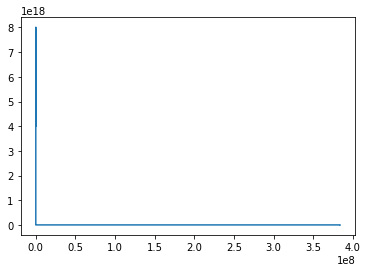

In [96]:
position=np.array(A.get_plist())
x, y = position.T
print(x)
print(y)
plt.plot(x,y)
plt.show()